### Flight price prediction model
#### Instruction:
1. You will have a dataset 
2. Find the cheapest and expenses fliht at a specific time.
3. You have to go through EDA
4. ML model
5. Find a sweet spot for a cheap ticket
   

- Ahmed is a customer of Sastaticket.pk. He is planning to fly from Karachi to Islamabad for his brother's wedding and is currently in the process of choosing tickets. Ahmed has to go to Islamabad but Ahmed also wants to save some money in the process, so he chooses to wait instead of buy now, simply because ticket prices are just too high.
- Is this the right decision? Won't ticket prices increase in the future? Perhaps there is sweet-spot Ahmed is hoping to find and maybe he just might find it. This is the problem that you will be tacking in this competition.
- Can you predict future prices accurately to such a degree that you can now tell Ahmed- with confidence- that he has made the wrong decision. Your task boils down to generating optimal predictions for flight prices of multiple airlines. If successful, your model will contribute greatly to Sastaticket's rich and diverse set off Operating algorithms.

#### 1. **Exploratory Data Analysis:**
We will extract information from our data.

In [1]:
# Import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load your data
# X_train = pd.read_csv('resources/gbs/X_train.csv')
# y_train = pd.read_csv('resources/gbs/y_train.csv')
# X_test = pd.read_csv('resources/gbs/X_test.csv')

In [3]:
# X_train.shape

In [4]:
# X_test.shape

In [5]:
# Check data
# X_train.head()

In [6]:
# y_train.head()

In [7]:
# I will take sample out of this data

# merge two datasets to make one 
# df = pd.concat([X_train, y_train], axis=1) #horizental stack

# df.sample(15)

In [8]:
# df.head()

In [9]:
# df.shape

In [10]:
# df = df.sample(5000)

In [11]:
# df.shape

In [12]:
# Saving testing file data to csv
# df.to_csv('resources/sastaticket_train.csv')

In [13]:
# Saving testing file data to csv 
# X_test.sample(250).to_csv('resources/sastaticket_test.csv')

In [14]:
df = pd.read_csv('resources/gbs/sastaticket_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [15]:
# EDA Analysis
print("column, Row", df.shape)

column, Row (5000, 14)


In [16]:
# Structure
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    5000 non-null   int64  
 1   Unnamed: 0.1  5000 non-null   int64  
 2   f1            5000 non-null   object 
 3   f2            5000 non-null   object 
 4   f3            5000 non-null   object 
 5   f4            5000 non-null   object 
 6   f5            5000 non-null   object 
 7   f6            5000 non-null   object 
 8   f7            5000 non-null   bool   
 9   f8            5000 non-null   float64
 10  f9            5000 non-null   int64  
 11  f10           5000 non-null   object 
 12  Unnamed: 0.2  5000 non-null   int64  
 13  target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(4), object(7)
memory usage: 512.8+ KB


In [17]:
# Check null value
df.isnull().sum()

Unnamed: 0      0
Unnamed: 0.1    0
f1              0
f2              0
f3              0
f4              0
f5              0
f6              0
f7              0
f8              0
f9              0
f10             0
Unnamed: 0.2    0
target          0
dtype: int64

In [18]:
# summary stats
df.describe()

,Unnamed: 0,Unnamed: 0.1,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.086293e+07,1.086293e+07,22.494400,0.944600,1.086293e+07,10104.351800
std,6.275456e+06,6.275456e+06,8.887101,0.607951,6.275456e+06,3359.936118
min,2.499000e+03,2.499000e+03,0.000000,0.000000,2.499000e+03,4990.000000
25%,5.417290e+06,5.417290e+06,20.000000,1.000000,5.417290e+06,7796.000000
50%,1.093803e+07,1.093803e+07,20.000000,1.000000,1.093803e+07,9403.000000
75%,1.621582e+07,1.621582e+07,32.000000,1.000000,1.621582e+07,11245.000000
max,2.177443e+07,2.177443e+07,45.000000,2.000000,2.177443e+07,33720.000000


In [19]:
df.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [20]:
print(df.columns)

Index(['Unnamed: 0', 'Unnamed: 0.1', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7',
       'f8', 'f9', 'f10', 'Unnamed: 0.2', 'target'],
      dtype='object')


In [21]:
# Feature Engineering 
# Finding unique values is categorical lists
cat_list = ['f2','f3','f6','f8','f9','f10']

# Unique value in each column
for i in cat_list:
    print(i, df[i].unique())
    print('-------------------') # separator line

f2 ['x']
-------------------
f3 ['y']
-------------------
f6 ['gamma' 'alpha' 'beta' 'omega']
-------------------
f8 [ 0. 35. 20. 15. 32. 40. 45.]
-------------------
f9 [0 1 2]
-------------------
f10 ['c-2' 'a-9' 'c-4' 'a-23' 'b-1' 'a-5' 'b-9' 'a-7' 'd-1' 'c-6' 'a-1' 'd-5'
 'b-69' 'b-19' 'd-3' 'b-319' 'b-369' 'b-67' 'b-73']
-------------------


In [22]:
df.drop(['Unnamed: 0', 'f2','f3','f10'], axis=1, inplace=True)

In [23]:
df.head()

,Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [24]:
# Type casting 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  5000 non-null   int64  
 1   f1            5000 non-null   object 
 2   f4            5000 non-null   object 
 3   f5            5000 non-null   object 
 4   f6            5000 non-null   object 
 5   f7            5000 non-null   bool   
 6   f8            5000 non-null   float64
 7   f9            5000 non-null   int64  
 8   Unnamed: 0.2  5000 non-null   int64  
 9   target        5000 non-null   float64
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 356.6+ KB


In [25]:
# convert them into date and time objects
from datetime import date, datetime

df['f1'] = pd.to_datetime(df['f1'])
df['f4'] = pd.to_datetime(df['f4'])
df['f5'] = pd.to_datetime(df['f5'])

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Unnamed: 0.1  5000 non-null   int64              
 1   f1            5000 non-null   datetime64[ns, UTC]
 2   f4            5000 non-null   datetime64[ns, UTC]
 3   f5            5000 non-null   datetime64[ns, UTC]
 4   f6            5000 non-null   object             
 5   f7            5000 non-null   bool               
 6   f8            5000 non-null   float64            
 7   f9            5000 non-null   int64              
 8   Unnamed: 0.2  5000 non-null   int64              
 9   target        5000 non-null   float64            
dtypes: bool(1), datetime64[ns, UTC](3), float64(2), int64(3), object(1)
memory usage: 356.6+ KB


In [27]:
df.head()

,Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [28]:
# adding columns after substraction
df.insert(0, "time_to_dep(s)", ((df['f4']-df['f1']).astype('timedelta64[s]')), True)
df.insert(1, "travel_time(s)", ((df['f5']-df['f4']).astype('timedelta64[s]')), True)


In [29]:
df.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,29688.0,7200.0,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,3033072.0,7200.0,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,363011.0,7200.0,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,2142368.0,6900.0,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [30]:
df.isnull().sum()

time_to_dep(s)    0
travel_time(s)    0
Unnamed: 0.1      0
f1                0
f4                0
f5                0
f6                0
f7                0
f8                0
f9                0
Unnamed: 0.2      0
target            0
dtype: int64

In [31]:
df.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,29688.0,7200.0,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,3033072.0,7200.0,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,363011.0,7200.0,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,2142368.0,6900.0,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [32]:
# df = df.rename(columns={'f12' : 'f1'})

In [33]:
df.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,29688.0,7200.0,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,3033072.0,7200.0,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,363011.0,7200.0,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,2142368.0,6900.0,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [34]:
cat_cols = ['f6', 'f7', 'f8', 'f9']
num_cols = ['time_to_dep(s)', 'travel_time(s)']

/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/hom

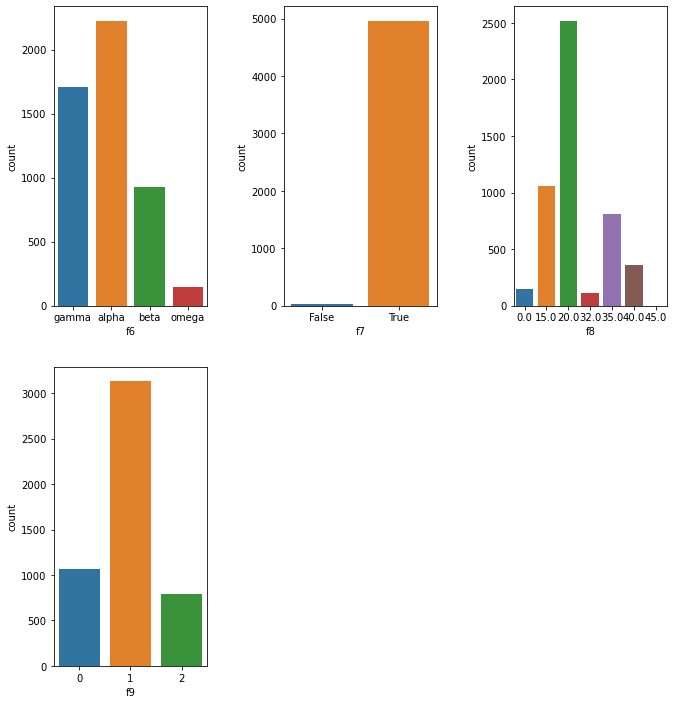

In [35]:
# Ploting categorical plot 
c=1
plt.figure(figsize= (10, 30))
for i in cat_cols:
    plt.subplot(6,3,c)
    sns.countplot(df[i])
    # plt.xticks(rotation=90)
    plt.tight_layout(pad=3.0)
    c =c+1
plt.show()

/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


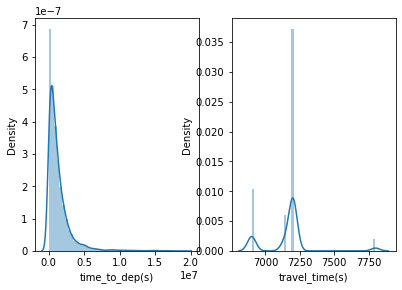

In [36]:
# Ploting categorical plot 
c=1
plt.figure(figsize= (10, 30))
for i in num_cols:
    plt.subplot(6,3,c)
    sns.distplot(df[i])
    # plt.xticks(rotation=90)
    # plt.tight_layout(pad=3.0)
    c =c+1
plt.show()

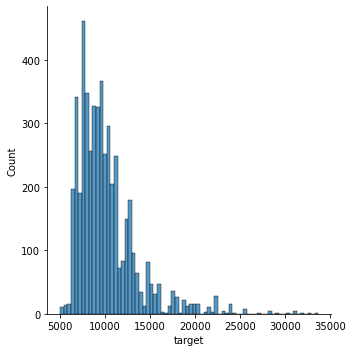

In [37]:
# target
sns.displot(df['target'])

/home/ibadhep/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target'>

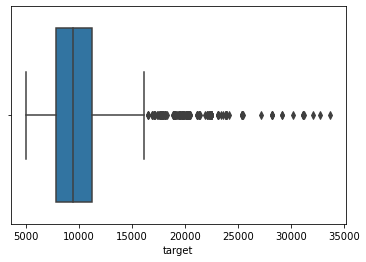

In [38]:
sns.boxplot(df.target)

In [39]:
#Skew and kurtosis
df.skew()

/tmp/ipykernel_160842/2093419498.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


time_to_dep(s)     3.703644
travel_time(s)     1.319374
Unnamed: 0.1      -0.017898
f7               -11.660949
f8                 0.418300
f9                 0.027547
Unnamed: 0.2      -0.017898
target             2.056345
dtype: float64

In [40]:
df.kurtosis()

/tmp/ipykernel_160842/615572439.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurtosis()


time_to_dep(s)     20.796049
travel_time(s)      5.504109
Unnamed: 0.1       -1.195964
f7                134.031335
f8                  0.046374
f9                 -0.310364
Unnamed: 0.2       -1.195964
target              6.344666
dtype: float64

In [41]:
# Outliners removal task

In [42]:
# encoding of variables 
df.head()


,time_to_dep(s),travel_time(s),Unnamed: 0.1,f1,f4,f5,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2021-01-08 12:43:27.828728+00:00,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,276919,7400.0
1,29688.0,7200.0,12092463,2021-07-01 04:45:11.397541+00:00,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,12092463,15377.0
2,3033072.0,7200.0,11061788,2021-06-24 11:28:47.565115+00:00,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,11061788,6900.0
3,363011.0,7200.0,8799808,2021-06-05 11:09:48.655927+00:00,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,8799808,9707.0
4,2142368.0,6900.0,16391150,2021-07-29 09:53:51.065306+00:00,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,16391150,6500.0


In [43]:
df.drop(['f1', 'f4', 'f5'], axis=1, inplace=True)

In [44]:
df.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,gamma,True,0.0,0,276919,7400.0
1,29688.0,7200.0,12092463,alpha,True,35.0,1,12092463,15377.0
2,3033072.0,7200.0,11061788,gamma,True,20.0,1,11061788,6900.0
3,363011.0,7200.0,8799808,alpha,True,15.0,1,8799808,9707.0
4,2142368.0,6900.0,16391150,beta,True,20.0,0,16391150,6500.0


In [46]:
# encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [48]:
# Apply label encoder
df['f6'] = le.fit_transform(df['f6'])
df['f7'] = le.fit_transform(df['f7'])
df['f8'] = le.fit_transform(df['f8'])

In [49]:
df.sample(10)

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
1676,1083325.0,7200.0,6591853,0,1,1,1,6591853,7397.0
2307,446730.0,7200.0,20746206,0,1,1,1,20746206,12945.0
2900,1417838.0,6900.0,16204721,1,1,2,0,16204721,6500.0
2416,2209954.0,7200.0,1426006,2,1,3,1,1426006,9405.0
878,437889.0,6900.0,15544700,0,1,4,1,15544700,12645.0
2666,457123.0,6900.0,5544732,1,1,2,0,5544732,6765.0
4694,1167766.0,6900.0,13523946,1,1,2,0,13523946,6730.0
1845,366347.0,6900.0,14528062,1,1,5,0,14528062,15380.0
4654,1662218.0,6900.0,5065288,1,1,5,0,5065288,9998.0
122,814480.0,7200.0,18271266,3,1,2,1,18271266,10100.0


In [50]:
df.describe()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.349212e+06,7159.836000,1.086293e+07,0.953400,0.992800,2.292000,0.944600,1.086293e+07,10104.351800
std,1.679384e+06,169.613345,6.275456e+06,0.948371,0.084555,1.247817,0.607951,6.275456e+06,3359.936118
min,2.003000e+03,6900.000000,2.499000e+03,0.000000,0.000000,0.000000,0.000000,2.499000e+03,4990.000000
25%,3.606870e+05,7140.000000,5.417290e+06,0.000000,1.000000,2.000000,1.000000,5.417290e+06,7796.000000
50%,8.634945e+05,7200.000000,1.093803e+07,1.000000,1.000000,2.000000,1.000000,1.093803e+07,9403.000000
75%,1.698816e+06,7200.000000,1.621582e+07,2.000000,1.000000,3.000000,1.000000,1.621582e+07,11245.000000
max,1.916464e+07,7800.000000,2.177443e+07,3.000000,1.000000,6.000000,2.000000,2.177443e+07,33720.000000


In [53]:
# sklearn function to scale our data / Normal 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['time_to_dep(s)']= sc.fit_transform(df['time_to_dep(s)'])
df['travel_time(s)']= sc.fit_transform(df['travel_time(s)'])
df['target']=sc.fit_transform(df['target'])


ValueError: Expected 2D array, got 1D array instead:
array=[1268192.   29688. 3033072. ... 1028737.  138286.  432375.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [54]:
df.columns

Index(['time_to_dep(s)', 'travel_time(s)', 'Unnamed: 0.1', 'f6', 'f7', 'f8',
       'f9', 'Unnamed: 0.2', 'target'],
      dtype='object')

In [56]:
# Spliting our data into x and y
X = df.drop(['target'], axis=1)
y = df['target']

In [57]:
X.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2
0,1268192.0,7200.0,276919,2,1,0,0,276919
1,29688.0,7200.0,12092463,0,1,4,1,12092463
2,3033072.0,7200.0,11061788,2,1,2,1,11061788
3,363011.0,7200.0,8799808,0,1,1,1,8799808
4,2142368.0,6900.0,16391150,1,1,2,0,16391150


In [58]:
y.head()

0     7400.0
1    15377.0
2     6900.0
3     9707.0
4     6500.0
Name: target, dtype: float64

#### ML Modeling

In [60]:
# Regression pipeline or algos (y is numeric)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# root mean squared error
# rms = mean_absolute_error(y_test, y_pred, squared=False)

In [61]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
svr = SVR()
knn = KNeighborsRegressor()


In [63]:
# lr.fit()
# lr(X_train, y_test)
# pred = lr.predict()

In [64]:
#model loop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(X_train, y_train) # fitting all model
    pred = i.predict(X_test) # predict
    test_score = r2_score(y_test, pred) # test score
    train_score = r2_score(y_train, i.predict(X_train)) # train score
    if abs(train_score-test_score) <= 0.1:
        print(1)
        print('R2 Score is:', r2_score(y_test, pred))
        print("Mean Absolute error is ", mean_absolute_error(y_test, pred))
        print("Mean Squared error is ", mean_absolute_error(y_test, pred))
        print("RMSE is", mean_squared_error(y_test, pred, squared=False))
        print('-----------------------------------------')



1
R2 Score is: 0.11571593230502275
Mean Absolute error is  2192.8052767691984
Mean Squared error is  2192.8052767691984
RMSE is 3042.487723438129
-----------------------------------------
1
R2 Score is: -0.06735882423853212
Mean Absolute error is  2235.268715598251
Mean Squared error is  2235.268715598251
RMSE is 3342.628846736674
-----------------------------------------


In [67]:
#model loop
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for i in [lr, dt, svr, knn]: # read all models 
    i.fit(X_train, y_train) # fitting all model
    pred = i.predict(X_test) # predict
    test_score = r2_score(y_test, pred) # test score
    train_score = r2_score(y_train, i.predict(X_train)) # train score
    if abs(train_score-test_score) <= 0.1:
        print(1)
        print('R2 Score is:', r2_score(y_test, pred))
        print("Mean Absolute error is ", mean_absolute_error(y_test, pred))
        print("Mean Squared error is ", mean_absolute_error(y_test, pred))
        print("RMSE is", mean_squared_error(y_test, pred, squared=False))
        print('-----------------------------------------')

# to save prediction 
res = pd.DataFrame(pred)
res.index = X_test.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results_with_traintestsplit.csv")

1
R2 Score is: 0.1290515682215273
Mean Absolute error is  2225.9918145962624
Mean Squared error is  2225.9918145962624
RMSE is 3133.1227104903046
-----------------------------------------
1
R2 Score is: -0.06766412108947661
Mean Absolute error is  2286.288171491711
Mean Squared error is  2286.288171491711
RMSE is 3468.9537376714925
-----------------------------------------


In [66]:
# Final data prediction
# lr = LinearRegression().fit(X,y)
# lr.predict(df_test)
# to save prediction 
# res = pd.DataFrame(pred)
# res.index = X_test.index # its important for comparison
# res.columns = ["prediction"]
# res.to_csv("prediction_results.csv")

NameError: name 'df_test' is not defined

### Second Method

In [68]:
df1 = pd.read_csv('resources/gbs/sastaticket_train.csv')
df1.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0


In [69]:
df.head()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
0,1268192.0,7200.0,276919,2,1,0,0,276919,7400.0
1,29688.0,7200.0,12092463,0,1,4,1,12092463,15377.0
2,3033072.0,7200.0,11061788,2,1,2,1,11061788,6900.0
3,363011.0,7200.0,8799808,0,1,1,1,8799808,9707.0
4,2142368.0,6900.0,16391150,1,1,2,0,16391150,6500.0


In [70]:
date_format_str = '%Y/%m/%d %H:%M:%S:f'
df1['f1'] = pd.to_datetime(df1['f1'])
df1['f4'] = pd.to_datetime(df1['f4'])

f1 = pd.to_datetime(df1['f1'], date_format_str)
f4 = pd.to_datetime(df1['f4'], date_format_str)
delta = f4 - f1
df1['delta'] =delta

In [71]:
df1.head()

,Unnamed: 0,Unnamed: 0.1,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,Unnamed: 0.2,target,delta
0,276919,276919,2021-01-08 12:43:27.828728+00:00,x,y,2021-01-23 05:00:00+00:00,2021-01-23 07:00:00+00:00,gamma,True,0.0,0,c-2,276919,7400.0,14 days 16:16:32.171272
1,12092463,12092463,2021-07-01 04:45:11.397541+00:00,x,y,2021-07-01 13:00:00+00:00,2021-07-01 15:00:00+00:00,alpha,True,35.0,1,a-9,12092463,15377.0,0 days 08:14:48.602459
2,11061788,11061788,2021-06-24 11:28:47.565115+00:00,x,y,2021-07-29 14:00:00+00:00,2021-07-29 16:00:00+00:00,gamma,True,20.0,1,c-4,11061788,6900.0,35 days 02:31:12.434885
3,8799808,8799808,2021-06-05 11:09:48.655927+00:00,x,y,2021-06-09 16:00:00+00:00,2021-06-09 18:00:00+00:00,alpha,True,15.0,1,a-23,8799808,9707.0,4 days 04:50:11.344073
4,16391150,16391150,2021-07-29 09:53:51.065306+00:00,x,y,2021-08-23 05:00:00+00:00,2021-08-23 06:55:00+00:00,beta,True,20.0,0,b-1,16391150,6500.0,24 days 19:06:08.934694


In [72]:
df.describe()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.349212e+06,7159.836000,1.086293e+07,0.953400,0.992800,2.292000,0.944600,1.086293e+07,10104.351800
std,1.679384e+06,169.613345,6.275456e+06,0.948371,0.084555,1.247817,0.607951,6.275456e+06,3359.936118
min,2.003000e+03,6900.000000,2.499000e+03,0.000000,0.000000,0.000000,0.000000,2.499000e+03,4990.000000
25%,3.606870e+05,7140.000000,5.417290e+06,0.000000,1.000000,2.000000,1.000000,5.417290e+06,7796.000000
50%,8.634945e+05,7200.000000,1.093803e+07,1.000000,1.000000,2.000000,1.000000,1.093803e+07,9403.000000
75%,1.698816e+06,7200.000000,1.621582e+07,2.000000,1.000000,3.000000,1.000000,1.621582e+07,11245.000000
max,1.916464e+07,7800.000000,2.177443e+07,3.000000,1.000000,6.000000,2.000000,2.177443e+07,33720.000000


In [73]:
# function to calculate time 
def convert(seconds):
    seconds = seconds % (24*3600)
    hour = seconds // 3600
    seconds %= 3600 
    minutes = seconds // 60
    seconds %= 60
    return "%d:%02d:%02d" % (hour, minutes, seconds)

# columns addition
df['time_1'] = df['time_to_dep(s)'].apply(convert)
df['time_2'] = df['travel_time(s)'].apply(convert)
df.sample(100)

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target,time_1,time_2
2287,4974827.0,7200.0,4230817,0,1,4,1,4230817,10799.0,13:53:47,2:00:00
4211,523266.0,7200.0,19351790,0,1,2,1,19351790,17745.0,1:21:06,2:00:00
4324,758648.0,7200.0,13342017,2,1,2,1,13342017,13130.0,18:44:08,2:00:00
143,98817.0,7200.0,1296188,2,1,3,1,1296188,9405.0,3:26:57,2:00:00
3783,371549.0,6900.0,11736294,1,1,5,0,11736294,9033.0,7:12:29,1:55:00
...,...,...,...,...,...,...,...,...,...,...,...
4765,952678.0,7200.0,17752561,2,1,2,2,17752561,10280.0,0:37:58,2:00:00
4337,1026209.0,7140.0,17621391,2,1,2,2,17621391,10280.0,21:03:29,1:59:00
2889,4085444.0,7200.0,10079013,0,1,4,1,10079013,7124.0,6:50:44,2:00:00
1074,1375468.0,7200.0,21162650,0,1,1,1,21162650,6810.0,22:04:28,2:00:00


In [74]:
df.describe()

,time_to_dep(s),travel_time(s),Unnamed: 0.1,f6,f7,f8,f9,Unnamed: 0.2,target
count,5.000000e+03,5000.000000,5.000000e+03,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000
mean,1.349212e+06,7159.836000,1.086293e+07,0.953400,0.992800,2.292000,0.944600,1.086293e+07,10104.351800
std,1.679384e+06,169.613345,6.275456e+06,0.948371,0.084555,1.247817,0.607951,6.275456e+06,3359.936118
min,2.003000e+03,6900.000000,2.499000e+03,0.000000,0.000000,0.000000,0.000000,2.499000e+03,4990.000000
25%,3.606870e+05,7140.000000,5.417290e+06,0.000000,1.000000,2.000000,1.000000,5.417290e+06,7796.000000
50%,8.634945e+05,7200.000000,1.093803e+07,1.000000,1.000000,2.000000,1.000000,1.093803e+07,9403.000000
75%,1.698816e+06,7200.000000,1.621582e+07,2.000000,1.000000,3.000000,1.000000,1.621582e+07,11245.000000
max,1.916464e+07,7800.000000,2.177443e+07,3.000000,1.000000,6.000000,2.000000,2.177443e+07,33720.000000


In [75]:
df['time_1'].min()

'0:00:05'

In [76]:
df['time_1'].max()

'9:59:59'